# data visualization

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import data and remove categorical variables

In [2]:
df = pd.read_csv("~/GitHub/3pt-shooting/data/preprocessed.csv")

char = df.select_dtypes(include=['object']).columns
df = df.drop(columns = char)

plot distributions of data 


In [3]:
# targets
pct_n = df['next_3P%']
pct_d = df['3pt_dif']
df = df.drop(columns = ['next_3P%', '3pt_dif'])

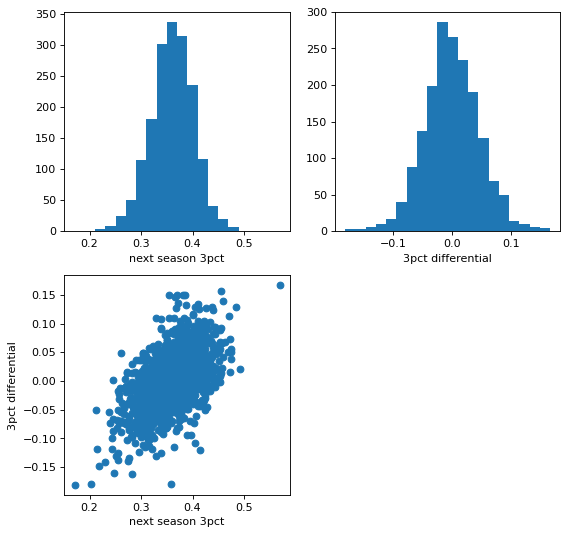

In [4]:
fig, axs = plt.subplots(2,2, figsize=(8, 8), dpi=80)
axs[0,0].hist(pct_n, bins = 20);axs[0,0].set_xlabel('next season 3pct')
axs[0,1].hist(pct_d, bins = 20);axs[0,1].set_xlabel('3pct differential')
axs[1,0].scatter(pct_n, pct_d);axs[1,0].set_xlabel('next season 3pct')
axs[1,0].set_ylabel('3pct differential')
fig.delaxes(axs.flatten()[3])


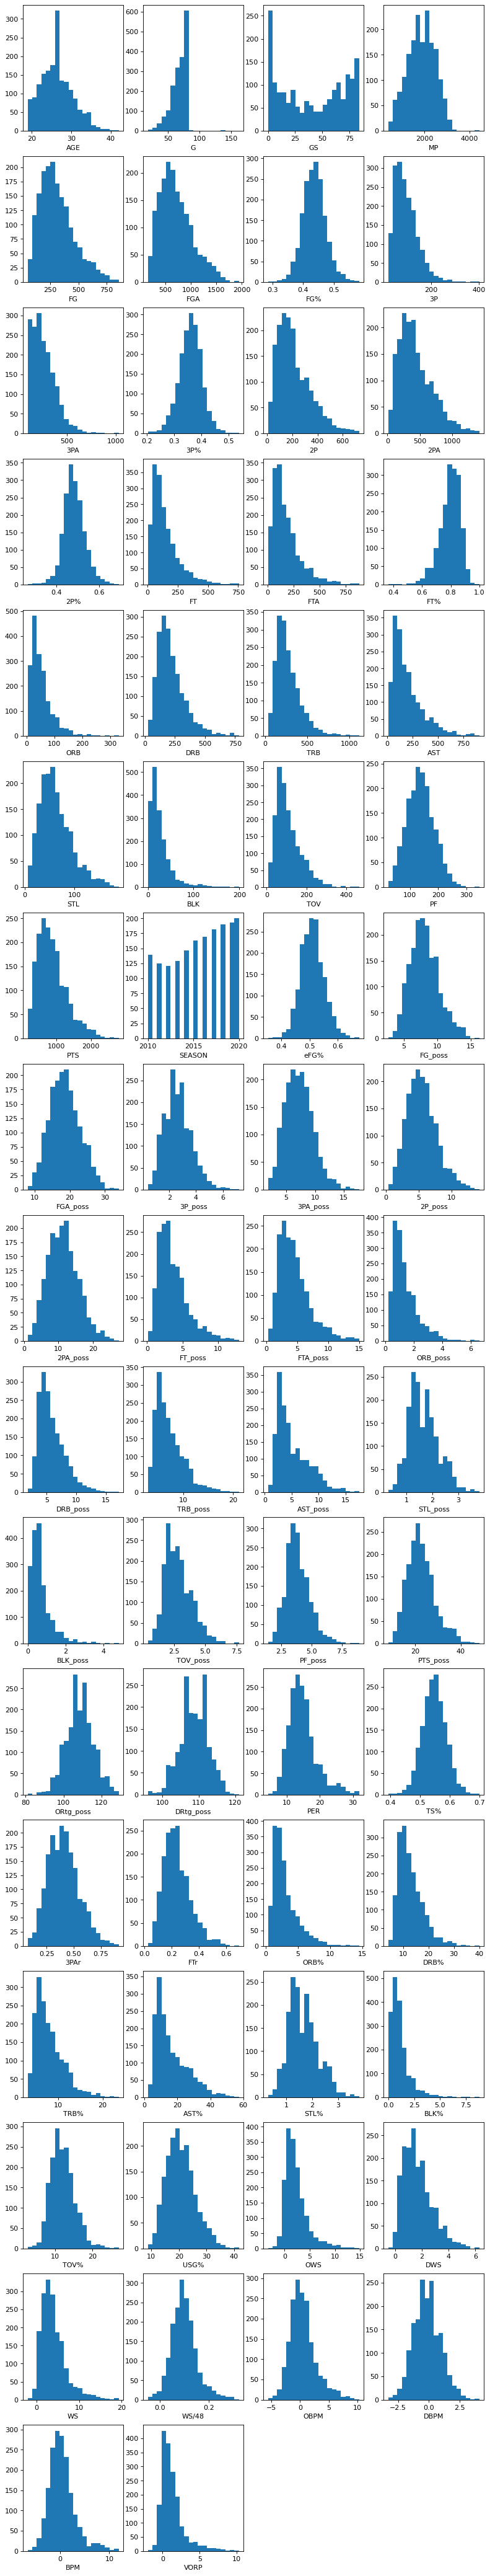

In [6]:
fig, axs = plt.subplots(17,4, figsize=(12, 68), dpi=80)


for i, col in enumerate(df.columns):

    x_i = i % 4
    y_i = int(i/4)

    axs[y_i,x_i].hist(df[col], bins = 20);axs[y_i,x_i].set_xlabel(col)
    # axs[y_i,x_i].hist(df[col]**(1/3), bins = 20);axs[y_i,x_i].set_xlabel(col)

    # axs[y_i,x_i].hist(np.log(df[col]+1e-10), bins = 20);axs[y_i,x_i].set_xlabel(col)


fig.delaxes(axs.flatten()[66])
fig.delaxes(axs.flatten()[67])

    

pick columns to log transform or cube roote for normality 

In [26]:
# don't transform these features
not_trans = ['G','GS', 'MP', 'FG%', '3P%', 'eFG%', "ORtg_poss" , 'DRtg_poss', 'TS%', 'DBPM','SEASON']

df_trans = df.drop(columns = not_trans)

for col in df_trans.columns:

    # if min(df_trans[col])> 0.0:
    #     df_trans[col] = np.log(df_trans[col])

    # elif min(df_trans[col]) == 0.0:
    #     df_trans[col] = np.log(df_trans[col] + 1e-10)

    # else:
    df_trans[col] = df_trans[col]**(1/3)

display transformations

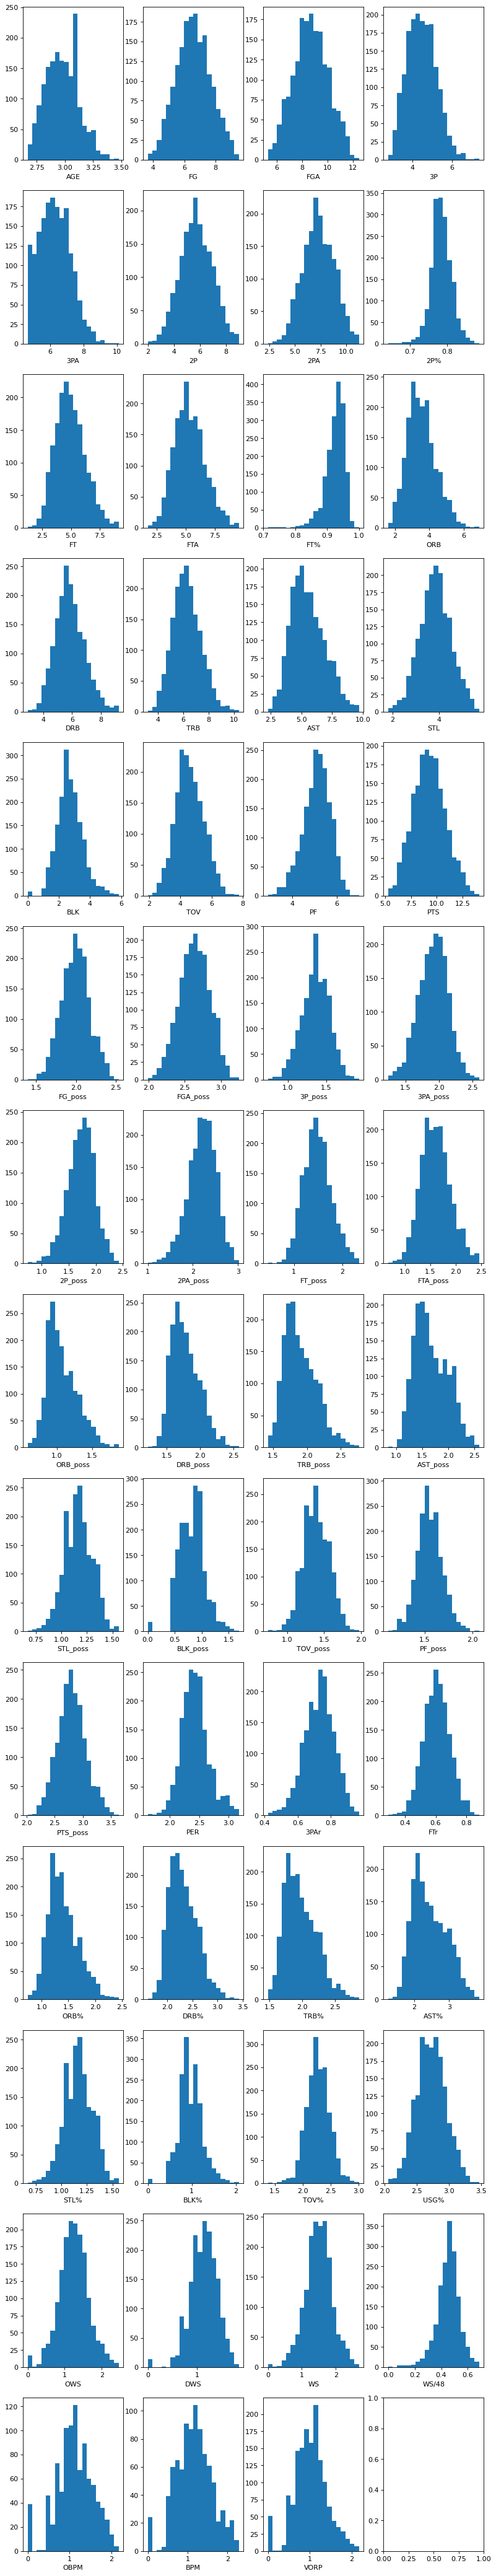

In [27]:
fig, axs = plt.subplots(14,4, figsize=(12, 68), dpi=80)


for i, col in enumerate(df_trans.columns):

    x_i = i % 4
    y_i = int(i/4)

    axs[y_i,x_i].hist(df_trans[col], bins = 20);axs[y_i,x_i].set_xlabel(col)

plot against target

FT%: 0.23
3P_poss: 0.28
3P%: 0.37
eFG%: 0.29
TS%: 0.26


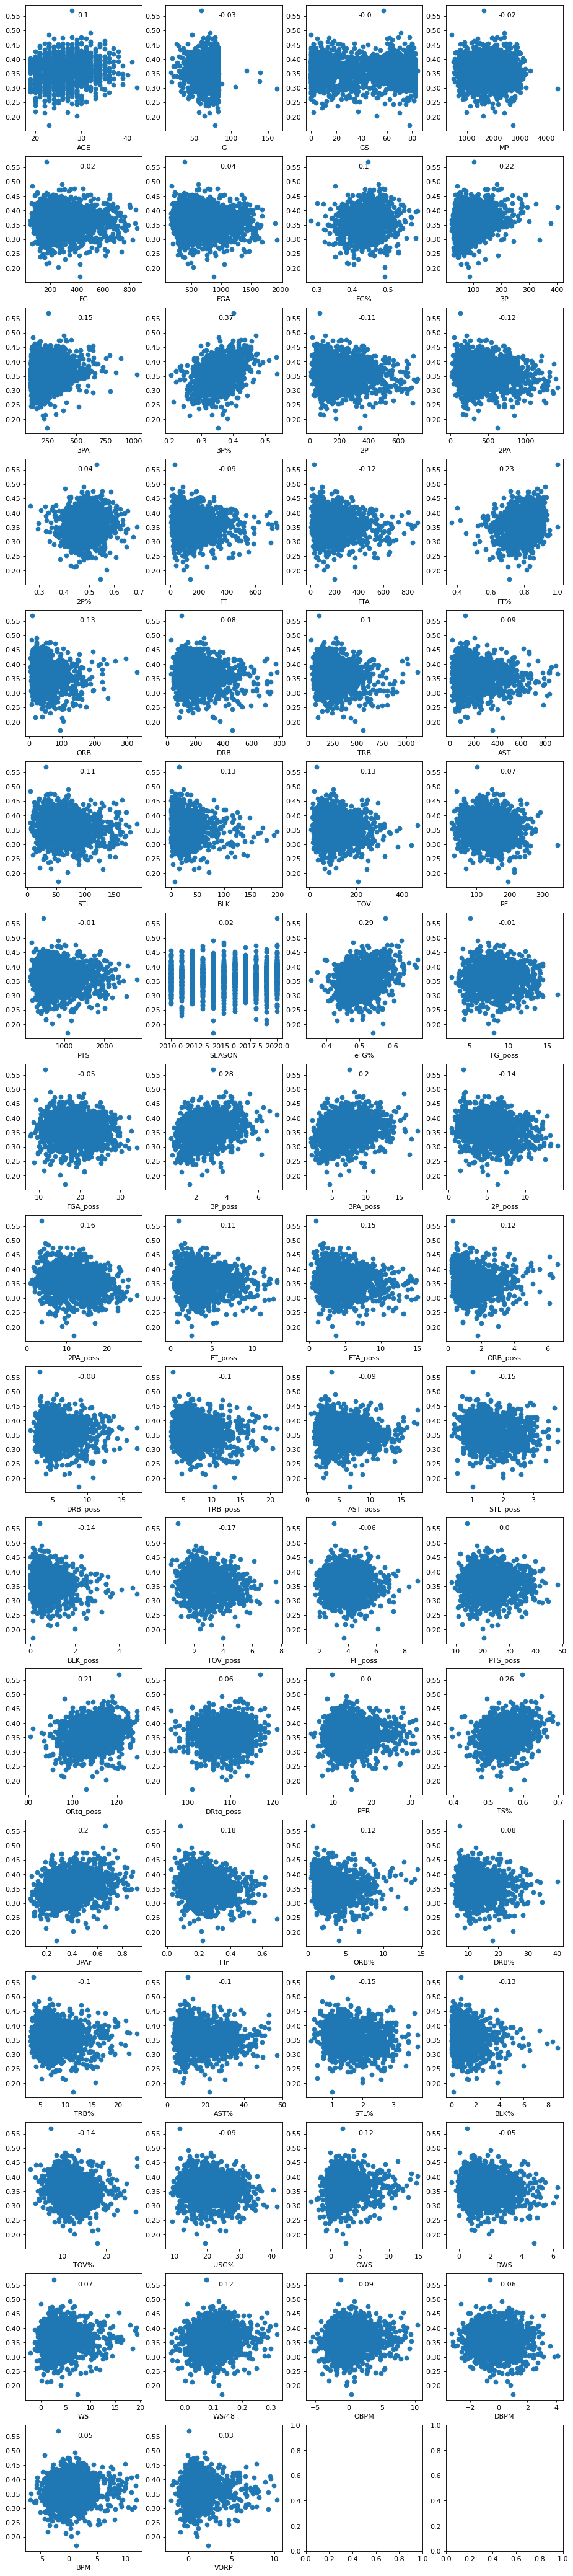

In [54]:
# plot against next seasons percentage

fig, axs = plt.subplots(17,4, figsize=(14, 68), dpi=80)

cors = list()
cols = list()

for i, col in enumerate(df.columns):

    x_i = i % 4
    y_i = int(i/4)

    x = df[col][np.isfinite(df[col])]
    y = pct_n[np.isfinite(df[col])]


    R = pearsonr(x, y)[0]
    cor = round(R, 2)

    if i < 5:
        cors.append(cor)
        cols.append(col)
    
    
    else:
        val = min(np.abs(cors))

        if abs(cor) > val:
            ind = list(np.abs(cors)).index(val)
            cors[ind] = cor
            cols[ind] = col


    axs[y_i,x_i].scatter(df[col], pct_n);axs[y_i,x_i].set_xlabel(col)
    axs[y_i,x_i].text(0.45, 0.9, cor, transform=axs[y_i,x_i].transAxes)

for i in range(len(cols)):
    print('%s: %s' % (cols[i], cors[i]))


ORtg_poss: -0.26
3P_poss: -0.22
3P%: -0.56
eFG%: -0.35
TS%: -0.32


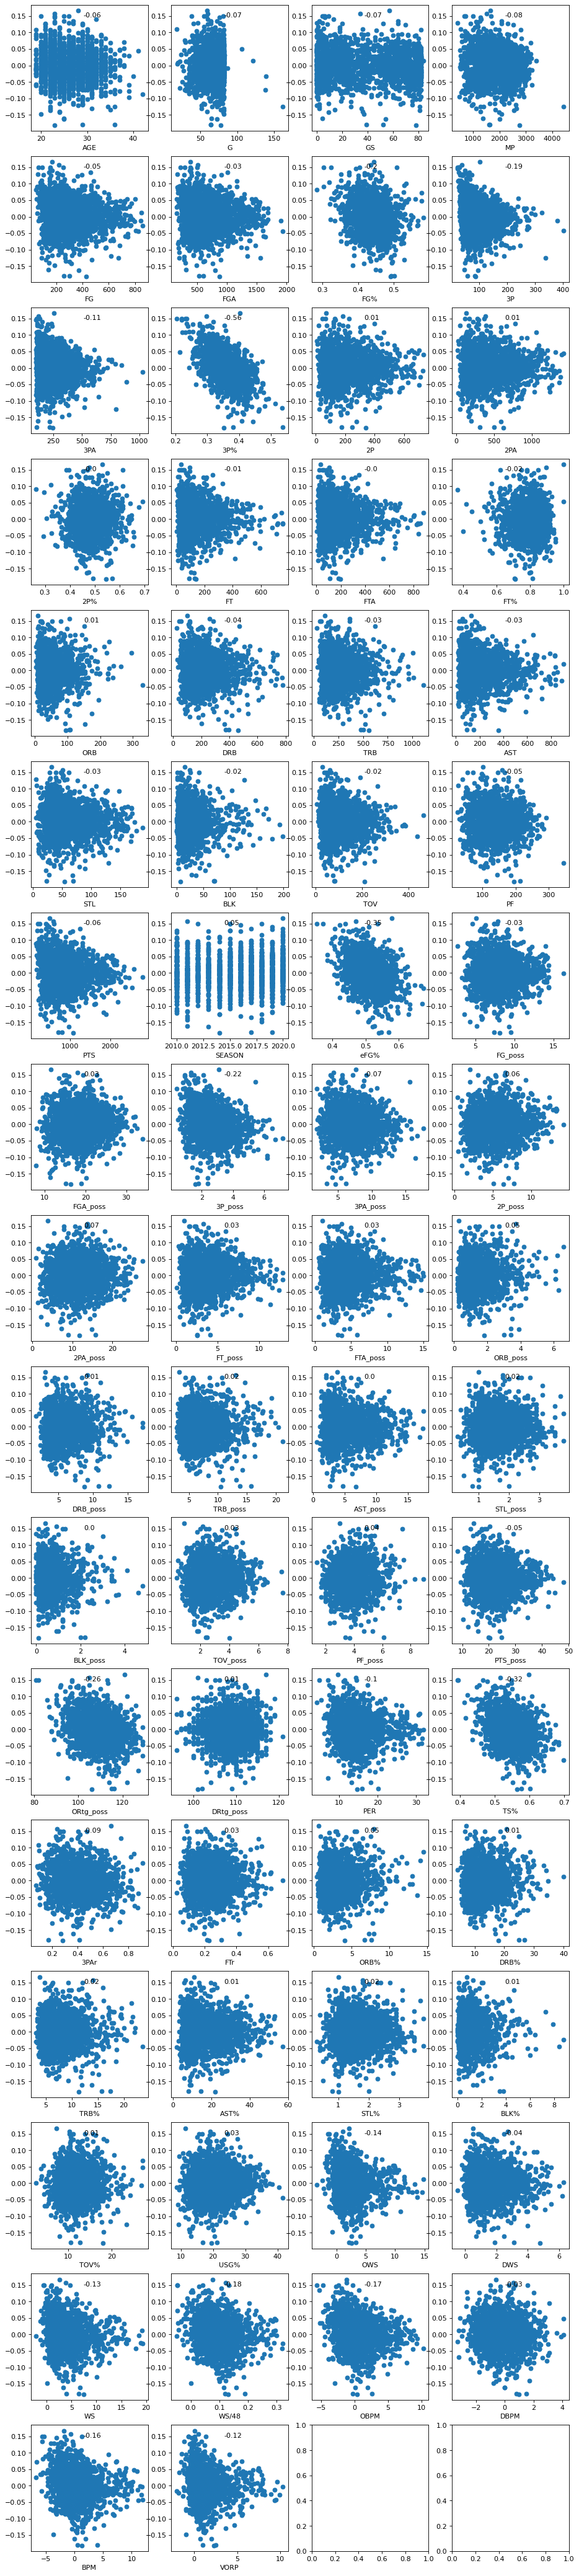

In [53]:
# plot against next seasons percentage

fig, axs = plt.subplots(17,4, figsize=(14, 68), dpi=80)

cors = list()
cols = list()

for i, col in enumerate(df.columns):

    x_i = i % 4
    y_i = int(i/4)

    x = df[col][np.isfinite(df[col])]
    y = pct_d[np.isfinite(df[col])]


    R = pearsonr(x, y)[0]
    cor = round(R, 2)

    if i < 5:
        cors.append(cor)
        cols.append(col)
    
    
    else:
        val = min(np.abs(cors))

        if abs(cor) > val:
            ind = list(np.abs(cors)).index(val)
            cors[ind] = cor
            cols[ind] = col


    axs[y_i,x_i].scatter(df[col], pct_d);axs[y_i,x_i].set_xlabel(col)
    axs[y_i,x_i].text(0.45, 0.9, cor, transform=axs[y_i,x_i].transAxes)

for i in range(len(cols)):
    print('%s: %s' % (cols[i], cors[i]))


Plot correlations between features